# House Price Prediction 

### Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Read the Excel File

In [2]:
df=pd.read_excel('DS - Assignment Part 1 data set.xlsx')
df.head()


,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


### Display shape of dataframe


In [3]:
df.shape


(414, 9)

### Print all columns of dataframe

In [4]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

### Describe Dataframe

In [5]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


### Column with Max NULL values

In [6]:
df.count().idxmin()

'Transaction date'

In [7]:
df.drop(columns='Transaction date')
     

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [8]:
s=df.corr()
s

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


<AxesSubplot:>

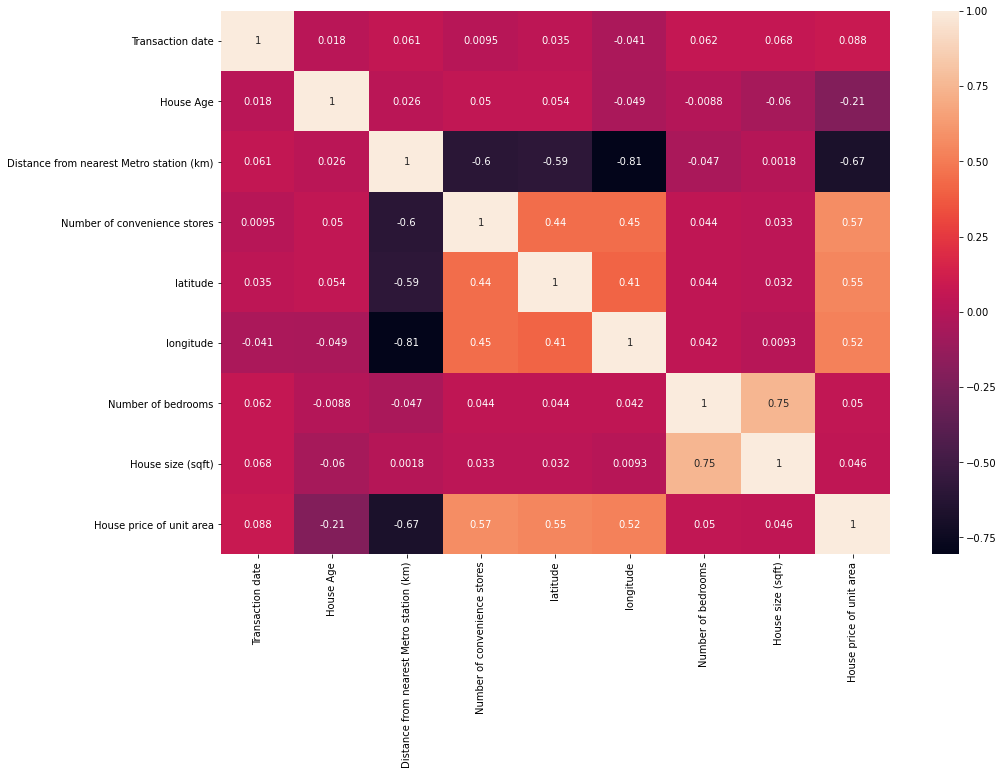

In [9]:
import seaborn as sns
# Defining figure size  
# for the output plot 
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(s,annot=True)

In [10]:
corr_mat = df.corr()
print(corr_mat['House price of unit area'].sort_values(ascending=True))

Distance from nearest Metro station (km)   -0.673613
House Age                                  -0.210567
House size (sqft)                           0.046489
Number of bedrooms                          0.050265
Transaction date                            0.087529
longitude                                   0.523287
latitude                                    0.546307
Number of convenience stores                0.571005
House price of unit area                    1.000000
Name: House price of unit area, dtype: float64


#### The house price per unit area is positively correlated with the number of convenience stores, as well as the latitude and longitude of the location.

 #### Which is the most common house ( number of convenience stores wise)


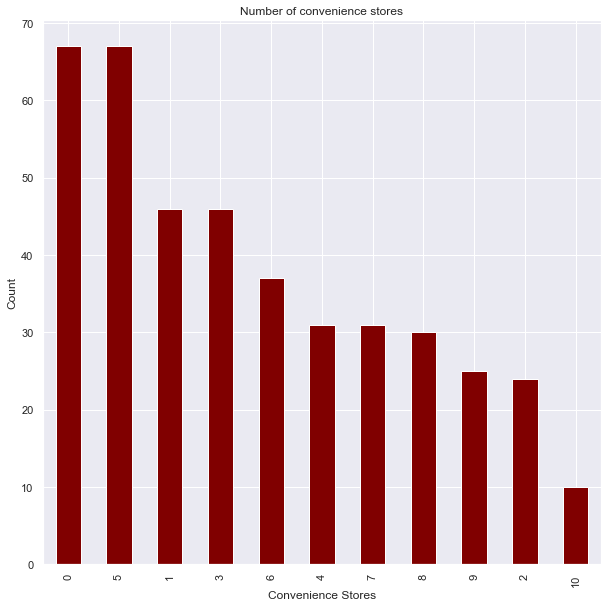

In [103]:
plt.figure(figsize=(10,10))
df['Number of convenience stores'].value_counts().plot(kind='bar',color='maroon')
plt.title('Number of convenience stores')
plt.xlabel('Convenience Stores')
plt.ylabel('Count')
sns.set_theme()

#### Visualizing the location of the houses based on latitude and longitude.

<Figure size 360x360 with 0 Axes>

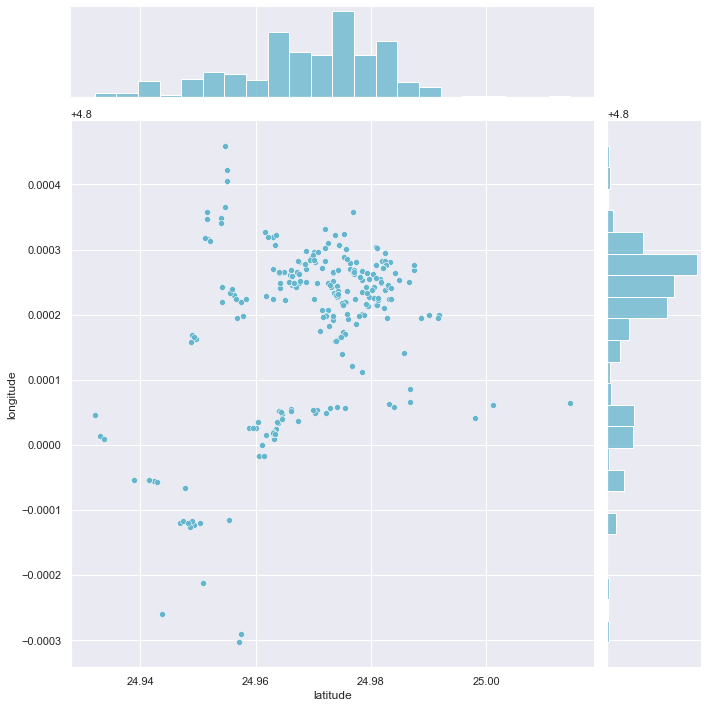

In [104]:
plt.figure(figsize=(5,5))
sns.jointplot(x=df['latitude'], y=df['longitude'], height=10,color='c')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.tight_layout()
sns.set_theme()

### Examining the distribution of the target variable

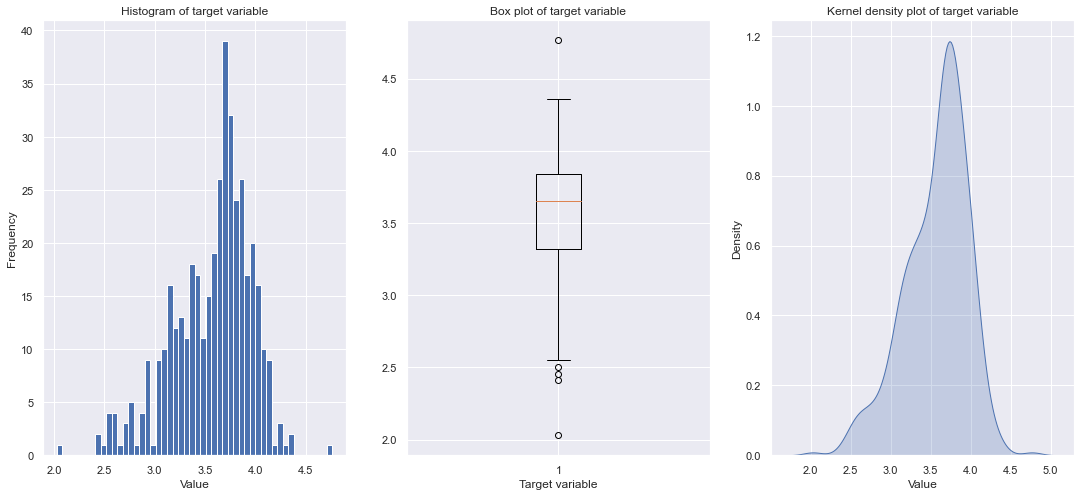

In [121]:
import matplotlib.pyplot as plt

# Calculate basic statistics
target_variable=df['House price of unit area']
mean = target_variable.mean()
median = target_variable.median()
std = target_variable.std()
plt.figure(figsize = (25,8))
# Plot a histogram
plt.subplot(1,4,1)
plt.hist(target_variable, bins=50)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of target variable')


# Plot a box plot
plt.subplot(1,4,2)
plt.boxplot(target_variable)
plt.xlabel('Target variable')
plt.title('Box plot of target variable')


# Plot a kernel density plot
plt.subplot(1,4,3)
sns.kdeplot(target_variable, shade=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel density plot of target variable')
plt.show()



#### The target variable does not have a normal distribution.


### Checking distribution of our data

**House Age**

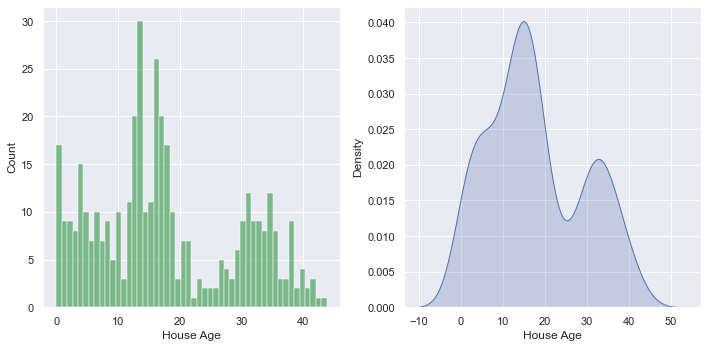

In [138]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x="House Age",color='g',bins=50)
plt.subplot(1,2,2)
sns.kdeplot(df['House Age'], shade = True, color = "b")
plt.tight_layout()

**Number of convenience stores**

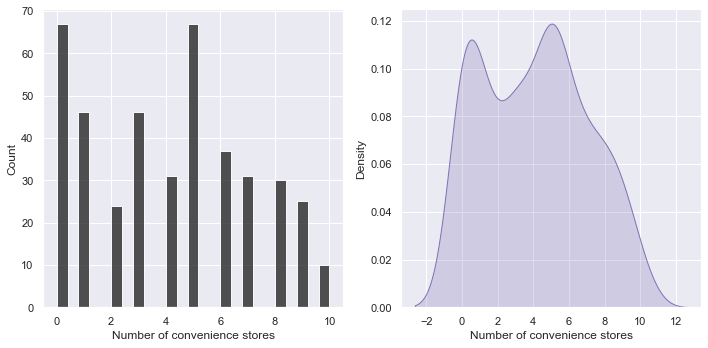

In [145]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x="Number of convenience stores",color='k',bins=25)
plt.subplot(1,2,2)
sns.kdeplot(df['Number of convenience stores'], shade = True, color = "m")
plt.tight_layout()

**Distance from nearest Metro station (km)**

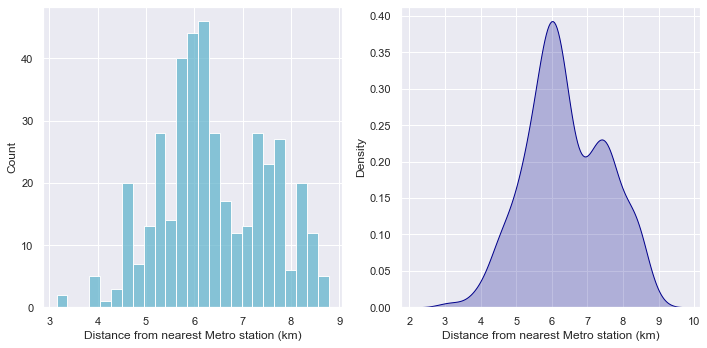

In [147]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x="Distance from nearest Metro station (km)",color='c',bins=25)
plt.subplot(1,2,2)
sns.kdeplot(df['Distance from nearest Metro station (km)'], shade = True, color = "darkblue")
plt.tight_layout()

**Latitude**

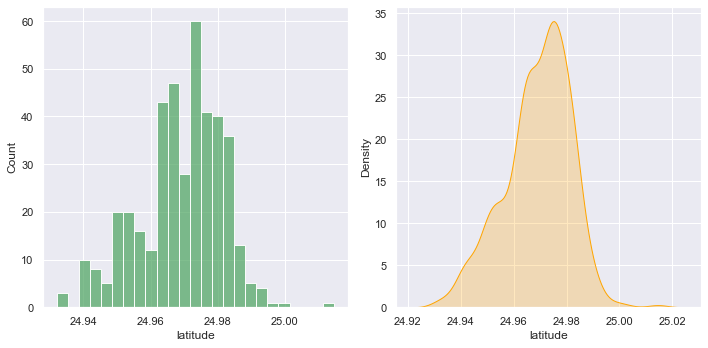

In [150]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x="latitude",color='g',bins=25)
plt.subplot(1,2,2)
sns.kdeplot(df['latitude'], shade = True, color = "orange")
plt.tight_layout()


**Longitude**

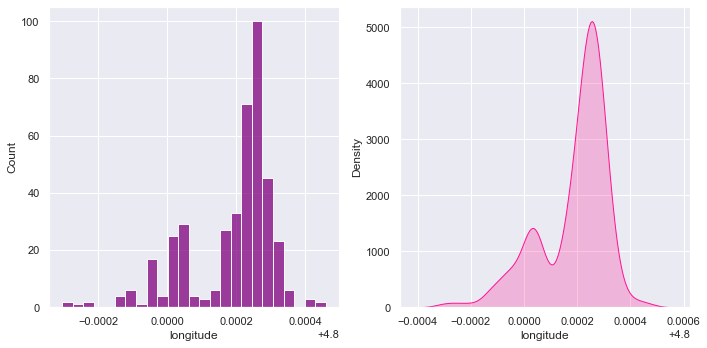

In [153]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x="longitude",color='purple',bins=25)
plt.subplot(1,2,2)
sns.kdeplot(df['longitude'], shade = True, color = "deeppink")
plt.tight_layout()

**Number of Bedrooms**


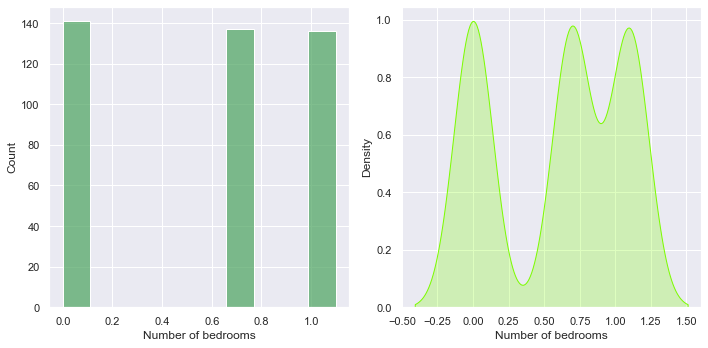

In [159]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x="Number of bedrooms",color='g',bins=10)
plt.subplot(1,2,2)
sns.kdeplot(df['Number of bedrooms'], shade = True, color = "lawngreen")
plt.tight_layout()

**House size (sqft)**

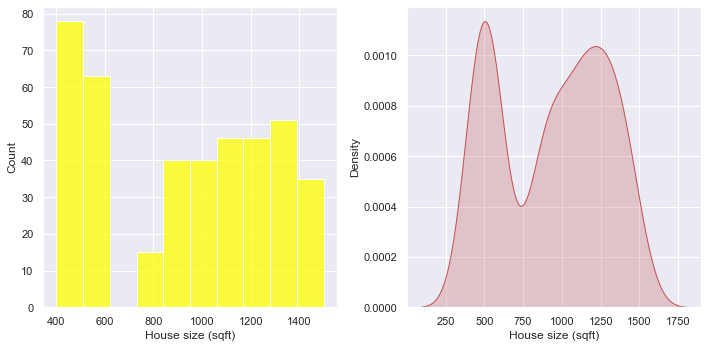

In [161]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x="House size (sqft)",color='yellow',bins=10)
plt.subplot(1,2,2)
sns.kdeplot(df['House size (sqft)'], shade = True, color = "r")
plt.tight_layout()

 ### Skewness of Data

In [21]:
skewness=df.skew().sort_values()
skewness

longitude                                  -1.219591
latitude                                   -0.438598
Transaction date                           -0.150834
House size (sqft)                          -0.113627
Number of bedrooms                          0.022309
Number of convenience stores                0.154607
House Age                                   0.382926
House price of unit area                    0.599853
Distance from nearest Metro station (km)    1.888757
dtype: float64

### Normalizing Skewed Columns


In [22]:
df['Distance from nearest Metro station (km)'] = np.log(df['Distance from nearest Metro station (km)'])
df["longitude"] = np.log(df["longitude"])
df['Number of bedrooms'] = np.log(df['Number of bedrooms'])
df['House price of unit area'] = np.log(df['House price of unit area'])

### Training And Testing


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Select the input features and target variable
X = df[['House Age', 'Distance from nearest Metro station (km)', 'Number of convenience stores', 'latitude', 'longitude', 
        'Number of bedrooms', 'House size (sqft)']]
y = df['House price of unit area']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1000)


## Linear Regression


R-Squared of Linear Regression model is 81.95813857315915%


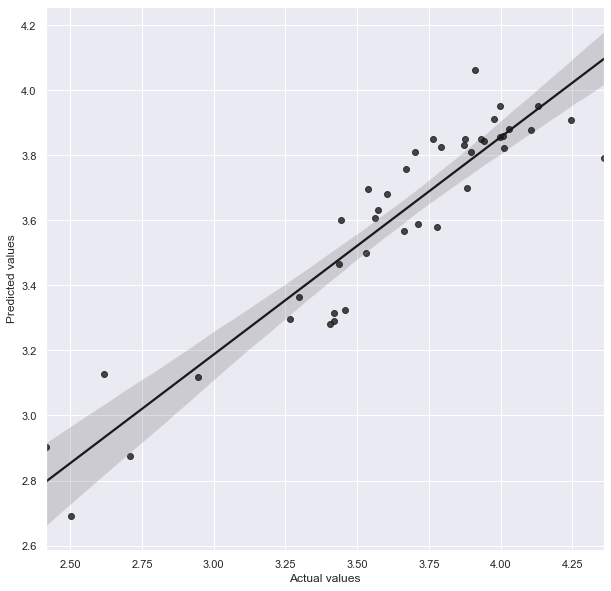

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2 # evaluation metric
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('R-Squared of Linear Regression model is {}%'.format(r2(y_test, y_pred)*100))
plt.figure(figsize=(10,10))
sns.regplot(x=y_test, y=y_pred, ci=95,color='k')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

## Bayesian Algorithm

R-Squared of Bayesian model is 80.08206055326728%


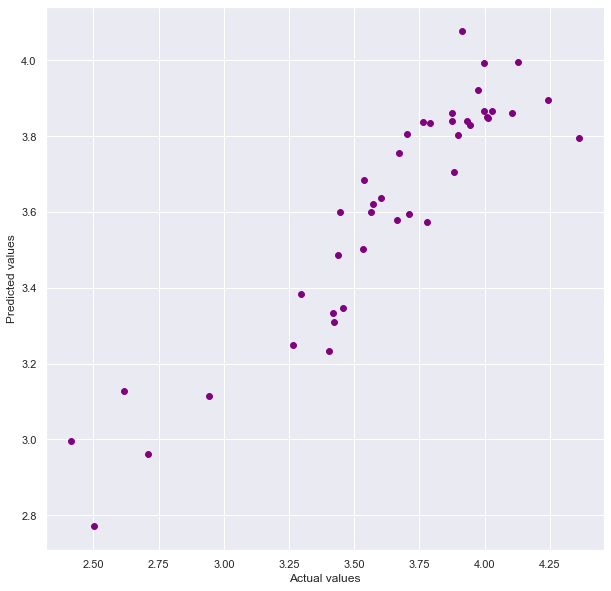

In [92]:
from sklearn.linear_model import BayesianRidge
from sklearn.datasets import make_regression
# Create Bayesian Ridge Regression model
model = BayesianRidge()
# Fit model to data
model.fit(X_train, y_train)
# Make predictions on test data
y_pred = model.predict(X_test)
print('R-Squared of Bayesian model is {}%'.format(r2(y_test, y_pred)*100))
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred,s=35,c='purple')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

## Random Forest Regressor


{'n_estimators': 50}
R-Squared of Random Forest Regressor model is 80.1505143138656%


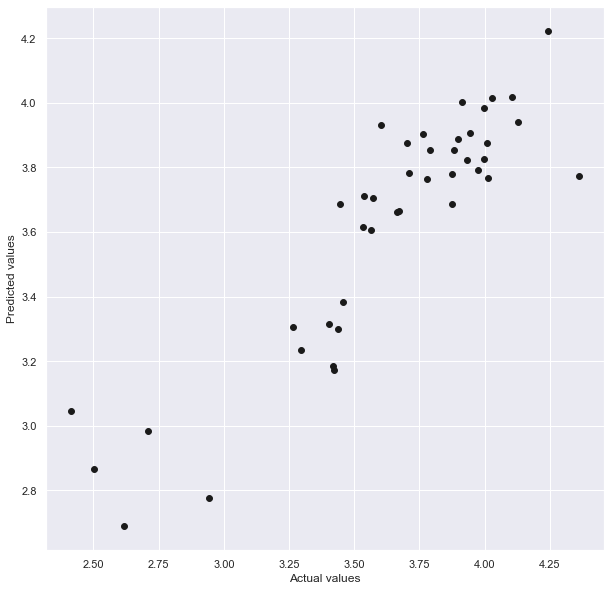

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {'n_estimators': [10, 50, 100, 200, 500]}

# Create the random forest regressor model
model = RandomForestRegressor()

# Set up the grid search
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the optimal value of n_estimators
print(grid_search.best_params_)

# Create Random Forest Regressor model using optimal value of n_estimators
model = RandomForestRegressor(n_estimators=50)
# Fit model to data
model.fit(X_train, y_train)
# Make predictions on test data
y_pred = model.predict(X_test)

print('R-Squared of Random Forest Regressor model is {}%'.format(r2(y_test, y_pred)*100))

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred,s=35,c='k')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

## Lasso Model

{'alpha': 0.001}
R-Squared of Lasso model is 75.05697588637918%


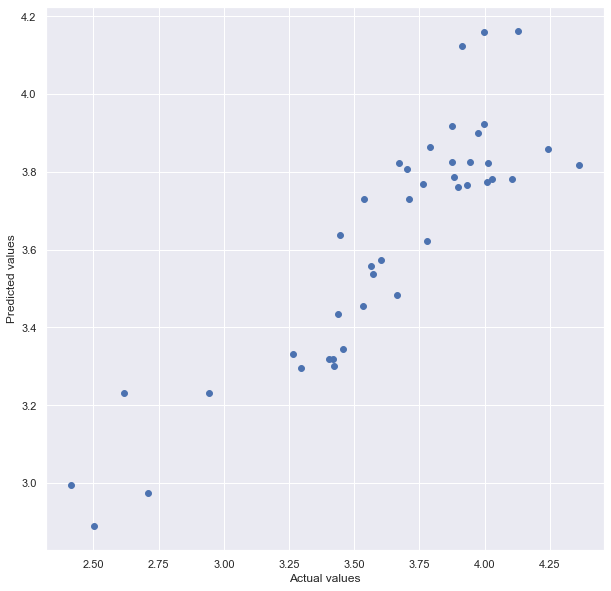

In [97]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Create the Lasso model
model = Lasso()

# Set up the grid search
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the optimal value of alpha
print(grid_search.best_params_)

#Using Calculated value of alpha 

#Create Lasso model
model = Lasso(alpha=0.001)
# Fit model to data
model.fit(X_train, y_train)
# Make predictions on test data
y_pred = model.predict(X_test)

print('R-Squared of Lasso model is {}%'.format(r2(y_test, y_pred)*100))
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred,s=35,cmap='virdis')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

## Ridge  Model

R-Squared of Ridge model is 75.89774675411137%


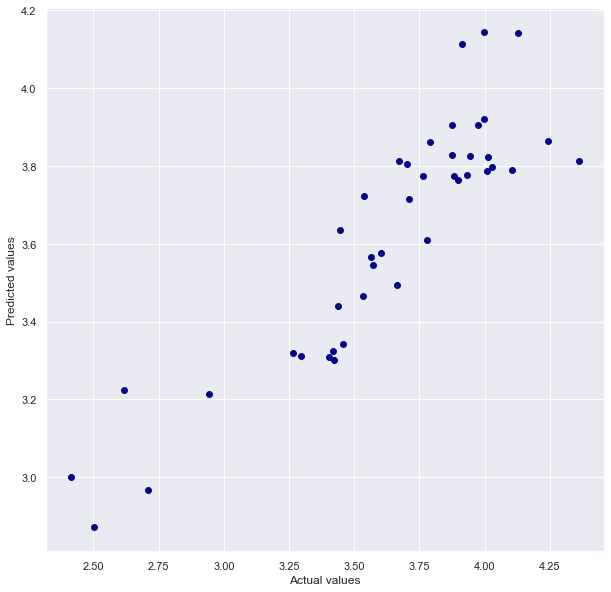

In [98]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression


# Create Ridge model
model = Ridge(alpha=0.1)

# Fit model to data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

print('R-Squared of Ridge model is {}%'.format(r2(y_test, y_pred)*100))
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred,s=35,c='darkblue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

## Elastic Net Alogorithm

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Create the Lasso model
model = Lasso()

# Set up the grid search
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the optimal value of alpha
print(grid_search.best_params_)

#Using Calculated value of alpha 
# Create Elastic Net model
model = ElasticNet(alpha=0.001)

# Fit model to data
model.fit(X, y)

# Make predictions on test data
y_pred = model.predict(X_test)
print('R-Squared of Elastic Net Alogrithm is {}%'.format(r2(y_test, y_pred)*100))
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred,s=35,c='darkblue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()


### According to the results, the Linear Regression model had an accuracy of 81% for predicting house prices. 
### Therefore, it is the best model for this task.

